In [2]:
# Quick test - is the kernel responsive?
print("Testing kernel responsiveness...")
print("2 + 2 =", 2 + 2)
print("✅ Kernel is working!")

Testing kernel responsiveness...
2 + 2 = 4
✅ Kernel is working!


In [3]:
import numpy as np

NumPy version: 2.3.4
NumPy array: [1 2 3 4 5]
Array mean: 3.0

Pandas version: 2.3.3
Pandas DataFrame:
   A  B
0  1  4
1  2  5
2  3  6

Matplotlib version: 3.10.7


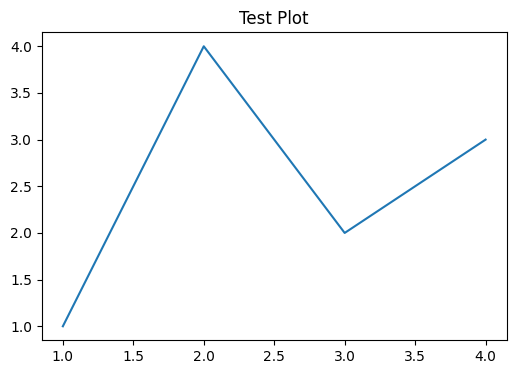


Scikit-learn version: Available
Iris dataset shape: (150, 4)

✅ All libraries are working correctly!


In [4]:
# Test all installed libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Test NumPy
print(f"NumPy version: {np.__version__}")
arr = np.array([1, 2, 3, 4, 5])
print(f"NumPy array: {arr}")
print(f"Array mean: {np.mean(arr)}")

# Test Pandas
print(f"\nPandas version: {pd.__version__}")
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
print("Pandas DataFrame:")
print(df)

# Test Matplotlib
print(f"\nMatplotlib version: {plt.matplotlib.__version__}")
plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.title("Test Plot")
plt.show()

# Test scikit-learn
print(f"\nScikit-learn version: {datasets.__sklearn_version__ if hasattr(datasets, '__sklearn_version__') else 'Available'}")
iris = datasets.load_iris()
print(f"Iris dataset shape: {iris.data.shape}")

print("\n✅ All libraries are working correctly!")

# ML From Scratch - Setup Complete! 

Now you're ready to implement machine learning algorithms from scratch. Here are some ideas for what you can build:

## Potential Projects:
1. **Linear Regression** - Implement gradient descent from scratch
2. **Logistic Regression** - Binary and multiclass classification
3. **Neural Networks** - Build a simple feedforward network
4. **K-Means Clustering** - Unsupervised learning algorithm
5. **Decision Trees** - Recursive splitting algorithm
6. **Principal Component Analysis (PCA)** - Dimensionality reduction

## Available Libraries:
- `numpy` - For numerical computations and matrix operations
- `matplotlib` - For plotting results and visualizations  
- `pandas` - For data manipulation and analysis
- `scikit-learn` - For loading datasets and comparing results

Let's start building! 🚀

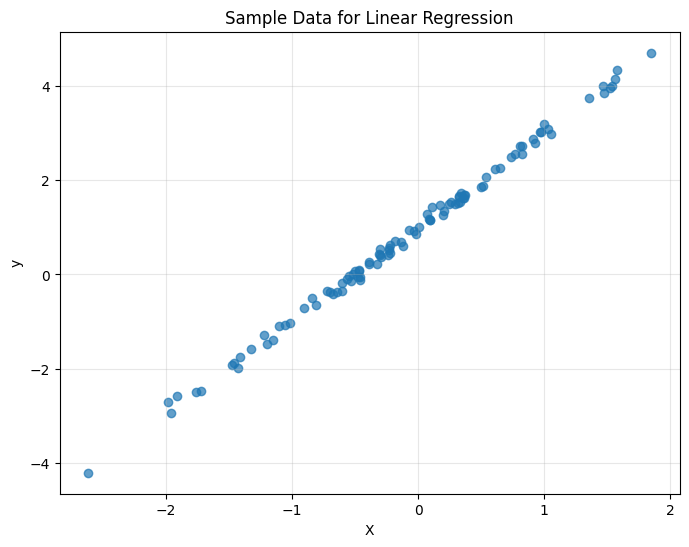

Data shape: X=(100, 1), y=(100,)
Ready to implement linear regression from scratch!


In [5]:
# Example: Simple Linear Regression from Scratch
# Let's create some sample data and implement basic linear regression

# Generate sample data
np.random.seed(42)
X = np.random.randn(100, 1)  # Features
y = 2 * X.flatten() + 1 + 0.1 * np.random.randn(100)  # Target: y = 2x + 1 + noise

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data for Linear Regression')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Data shape: X={X.shape}, y={y.shape}")
print("Ready to implement linear regression from scratch!")

In [6]:
X = np.array([[73, 67, 43],
             [91, 88, 64],
             [87, 134, 58],
             [102, 43, 37],
             [69, 96, 70]], dtype=float)
X

array([[ 73.,  67.,  43.],
       [ 91.,  88.,  64.],
       [ 87., 134.,  58.],
       [102.,  43.,  37.],
       [ 69.,  96.,  70.]])

In [7]:
X.shape

(5, 3)

In [8]:
ones = np.ones(shape=(len(X), 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
# Check the shape of ones array
print("ones array:", ones)
print("Shape of ones:", ones.shape)
print("Number of dimensions:", ones.ndim)
print()

# The 'ones' array is a 1D array (neither row nor column vector in matrix sense)
# Let's create actual row and column vectors for comparison:

# Row vector (1 row, multiple columns)
row_vector = ones.reshape(1, -1)  # or ones[np.newaxis, :]
print("Row vector shape:", row_vector.shape)
print("Row vector:\n", row_vector)
print()

# Column vector (multiple rows, 1 column)  
column_vector = ones.reshape(-1, 1)  # or ones[:, np.newaxis]
print("Column vector shape:", column_vector.shape)
print("Column vector:\n", column_vector)

ones array: [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Shape of ones: (5, 1)
Number of dimensions: 2

Row vector shape: (1, 5)
Row vector:
 [[1. 1. 1. 1. 1.]]

Column vector shape: (5, 1)
Column vector:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [10]:
# Explaining: ones = np.ones(shape=(len(X), 1))

print("Breaking down the code:")
print("1. len(X) =", len(X))
print("2. X.shape =", X.shape)
print("3. (len(X), 1) =", (len(X), 1))
print()

print("What np.ones() does:")
print("- Creates an array filled with 1.0 values")
print("- shape=(len(X), 1) means:")
print("  * len(X) rows (same as number of samples in X)")
print("  * 1 column")
print()

print("Result:")
print("ones =")
print(ones)
print(f"Shape: {ones.shape}")
print()

print("Why is this useful in linear regression?")
print("- This creates a column vector of ones")
print("- Used for the intercept/bias term")
print("- Will be combined with X to create the design matrix")
print("- Design matrix = [ones | X] for linear regression with intercept")

Breaking down the code:
1. len(X) = 5
2. X.shape = (5, 3)
3. (len(X), 1) = (5, 1)

What np.ones() does:
- Creates an array filled with 1.0 values
- shape=(len(X), 1) means:
  * len(X) rows (same as number of samples in X)
  * 1 column

Result:
ones =
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Shape: (5, 1)

Why is this useful in linear regression?
- This creates a column vector of ones
- Used for the intercept/bias term
- Will be combined with X to create the design matrix
- Design matrix = [ones | X] for linear regression with intercept


In [11]:
# Demonstration: Creating the design matrix for linear regression

print("Original feature matrix X:")
print("Shape:", X.shape)
print(X)
print()

print("Column of ones:")
print("Shape:", ones.shape)
print(ones)
print()

# Combine ones with X to create design matrix
X_design = np.hstack([ones, X])  # horizontally stack ones and X

print("Design matrix (X_design = [ones | X]):")
print("Shape:", X_design.shape)
print(X_design)
print()

print("Now we can use this for linear regression:")
print("y = X_design @ theta")
print("where theta = [intercept, weight1, weight2, weight3]")

Original feature matrix X:
Shape: (5, 3)
[[ 73.  67.  43.]
 [ 91.  88.  64.]
 [ 87. 134.  58.]
 [102.  43.  37.]
 [ 69.  96.  70.]]

Column of ones:
Shape: (5, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]

Design matrix (X_design = [ones | X]):
Shape: (5, 4)
[[  1.  73.  67.  43.]
 [  1.  91.  88.  64.]
 [  1.  87. 134.  58.]
 [  1. 102.  43.  37.]
 [  1.  69.  96.  70.]]

Now we can use this for linear regression:
y = X_design @ theta
where theta = [intercept, weight1, weight2, weight3]


In [12]:
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [13]:
X1 = np.append(ones, X)
X1

array([  1.,   1.,   1.,   1.,   1.,  73.,  67.,  43.,  91.,  88.,  64.,
        87., 134.,  58., 102.,  43.,  37.,  69.,  96.,  70.])

In [14]:
X

array([[ 73.,  67.,  43.],
       [ 91.,  88.,  64.],
       [ 87., 134.,  58.],
       [102.,  43.,  37.],
       [ 69.,  96.,  70.]])

In [15]:
# Problem with np.append() - it flattens by default!
print("❌ Wrong way: np.append() flattens the arrays")
X1_wrong = np.append(ones, X)
print("Shape:", X1_wrong.shape)
print("Result (flattened):", X1_wrong)
print()

print("✅ Correct ways to add a column:")
print()

# Method 1: np.hstack() - horizontally stack
print("Method 1: np.hstack()")
X1_hstack = np.hstack([ones, X])
print("Shape:", X1_hstack.shape)
print("Result:")
print(X1_hstack)
print()

# Method 2: np.append() with axis parameter
print("Method 2: np.append() with axis=1")
X1_append = np.append(ones, X, axis=1)
print("Shape:", X1_append.shape)
print("Result:")
print(X1_append)
print()

# Method 3: np.concatenate()
print("Method 3: np.concatenate() with axis=1")
X1_concat = np.concatenate([ones, X], axis=1)
print("Shape:", X1_concat.shape)
print("Result:")
print(X1_concat)
print()

print("All three methods produce the same result!")
print("Recommended: Use np.hstack() for clarity")

❌ Wrong way: np.append() flattens the arrays
Shape: (20,)
Result (flattened): [  1.   1.   1.   1.   1.  73.  67.  43.  91.  88.  64.  87. 134.  58.
 102.  43.  37.  69.  96.  70.]

✅ Correct ways to add a column:

Method 1: np.hstack()
Shape: (5, 4)
Result:
[[  1.  73.  67.  43.]
 [  1.  91.  88.  64.]
 [  1.  87. 134.  58.]
 [  1. 102.  43.  37.]
 [  1.  69.  96.  70.]]

Method 2: np.append() with axis=1
Shape: (5, 4)
Result:
[[  1.  73.  67.  43.]
 [  1.  91.  88.  64.]
 [  1.  87. 134.  58.]
 [  1. 102.  43.  37.]
 [  1.  69.  96.  70.]]

Method 3: np.concatenate() with axis=1
Shape: (5, 4)
Result:
[[  1.  73.  67.  43.]
 [  1.  91.  88.  64.]
 [  1.  87. 134.  58.]
 [  1. 102.  43.  37.]
 [  1.  69.  96.  70.]]

All three methods produce the same result!
Recommended: Use np.hstack() for clarity


In [16]:
X1_append

array([[  1.,  73.,  67.,  43.],
       [  1.,  91.,  88.,  64.],
       [  1.,  87., 134.,  58.],
       [  1., 102.,  43.,  37.],
       [  1.,  69.,  96.,  70.]])

In [17]:
X1_append.shape

(5, 4)

In [18]:
(X1_append.T @ X1_append).shape

(4, 4)

In [19]:
y = np.array([56, 81, 119, 22, 103], dtype=float).reshape(-1, 1)
y

array([[ 56.],
       [ 81.],
       [119.],
       [ 22.],
       [103.]])

In [20]:
y.shape

(5, 1)

In [21]:
beta = np.linalg.inv(X1_append.T @ X1_append)@X1_append.T@y

In [22]:
beta

array([[-1.637613  ],
       [-0.38757424],
       [ 0.84775684],
       [ 0.69817818]])

# Model Evaluation

Now let's evaluate our linear regression model by:
1. **Interpreting coefficients** - Understanding what each coefficient means
2. **Making predictions** - Using the model to predict new values
3. **Calculating metrics** - Measuring model performance
4. **Visualizing results** - Plotting predictions vs actual values

In [23]:
# 1. Interpret the coefficients
print("📊 MODEL COEFFICIENTS INTERPRETATION")
print("="*50)
print(f"Intercept (β₀): {beta[0, 0]:.4f}")
print(f"Feature 1 (β₁): {beta[1, 0]:.4f}")
print(f"Feature 2 (β₂): {beta[2, 0]:.4f}")
print(f"Feature 3 (β₃): {beta[3, 0]:.4f}")
print()

print("Model equation:")
print(f"y = {beta[0, 0]:.4f} + {beta[1, 0]:.4f}*x₁ + {beta[2, 0]:.4f}*x₂ + {beta[3, 0]:.4f}*x₃")
print()

print("Interpretation:")
print(f"• For each unit increase in x₁, y changes by {beta[1, 0]:.4f}")
print(f"• For each unit increase in x₂, y changes by {beta[2, 0]:.4f}")
print(f"• For each unit increase in x₃, y changes by {beta[3, 0]:.4f}")
print(f"• When all features are 0, y = {beta[0, 0]:.4f}")

📊 MODEL COEFFICIENTS INTERPRETATION
Intercept (β₀): -1.6376
Feature 1 (β₁): -0.3876
Feature 2 (β₂): 0.8478
Feature 3 (β₃): 0.6982

Model equation:
y = -1.6376 + -0.3876*x₁ + 0.8478*x₂ + 0.6982*x₃

Interpretation:
• For each unit increase in x₁, y changes by -0.3876
• For each unit increase in x₂, y changes by 0.8478
• For each unit increase in x₃, y changes by 0.6982
• When all features are 0, y = -1.6376


In [24]:
# 2. Make predictions using the model
print("🎯 MAKING PREDICTIONS")
print("="*50)

# Predictions on training data
y_pred = X1_append @ beta
print("Predictions on training data:")
print("Shape:", y_pred.shape)
print(y_pred.flatten())
print()

# Compare with actual values
print("Actual vs Predicted:")
print("Actual    | Predicted | Residual")
print("-" * 35)
for i in range(len(y)):
    residual = y[i, 0] - y_pred[i, 0]
    print(f"{y[i, 0]:8.2f} | {y_pred[i, 0]:8.2f}  | {residual:8.2f}")
print()

# Example: Predict for a new data point
print("Example prediction for new data:")
new_sample = np.array([[1, 80, 90, 50]])  # [bias, feature1, feature2, feature3]
new_prediction = new_sample @ beta
print(f"For features [80, 90, 50]: predicted y = {new_prediction[0, 0]:.2f}")

🎯 MAKING PREDICTIONS
Predictions on training data:
Shape: (5, 1)
[ 56.89083779  82.37913697 118.73717962  21.11595158 101.87689403]

Actual vs Predicted:
Actual    | Predicted | Residual
-----------------------------------
   56.00 |    56.89  |    -0.89
   81.00 |    82.38  |    -1.38
  119.00 |   118.74  |     0.26
   22.00 |    21.12  |     0.88
  103.00 |   101.88  |     1.12

Example prediction for new data:
For features [80, 90, 50]: predicted y = 78.56


In [25]:
# 3. Calculate evaluation metrics
print("📈 MODEL PERFORMANCE METRICS")
print("="*50)

# Calculate residuals
residuals = y - y_pred
print("Residuals shape:", residuals.shape)

# Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# R-squared (coefficient of determination)
# R² = 1 - (SS_res / SS_tot)
ss_res = np.sum(residuals**2)  # Sum of squares of residuals
ss_tot = np.sum((y - np.mean(y))**2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared (R²): {r_squared:.4f}")

print()
print("Interpretation:")
print(f"• The model explains {r_squared*100:.1f}% of the variance in the target")
print(f"• On average, predictions are off by {mae:.2f} units (MAE)")
print(f"• RMSE of {rmse:.2f} shows the standard deviation of prediction errors")

📈 MODEL PERFORMANCE METRICS
Residuals shape: (5, 1)
Mean Squared Error (MSE): 0.9615
Root Mean Squared Error (RMSE): 0.9806
Mean Absolute Error (MAE): 0.9080
R-squared (R²): 0.9992

Interpretation:
• The model explains 99.9% of the variance in the target
• On average, predictions are off by 0.91 units (MAE)
• RMSE of 0.98 shows the standard deviation of prediction errors


📊 VISUALIZATION


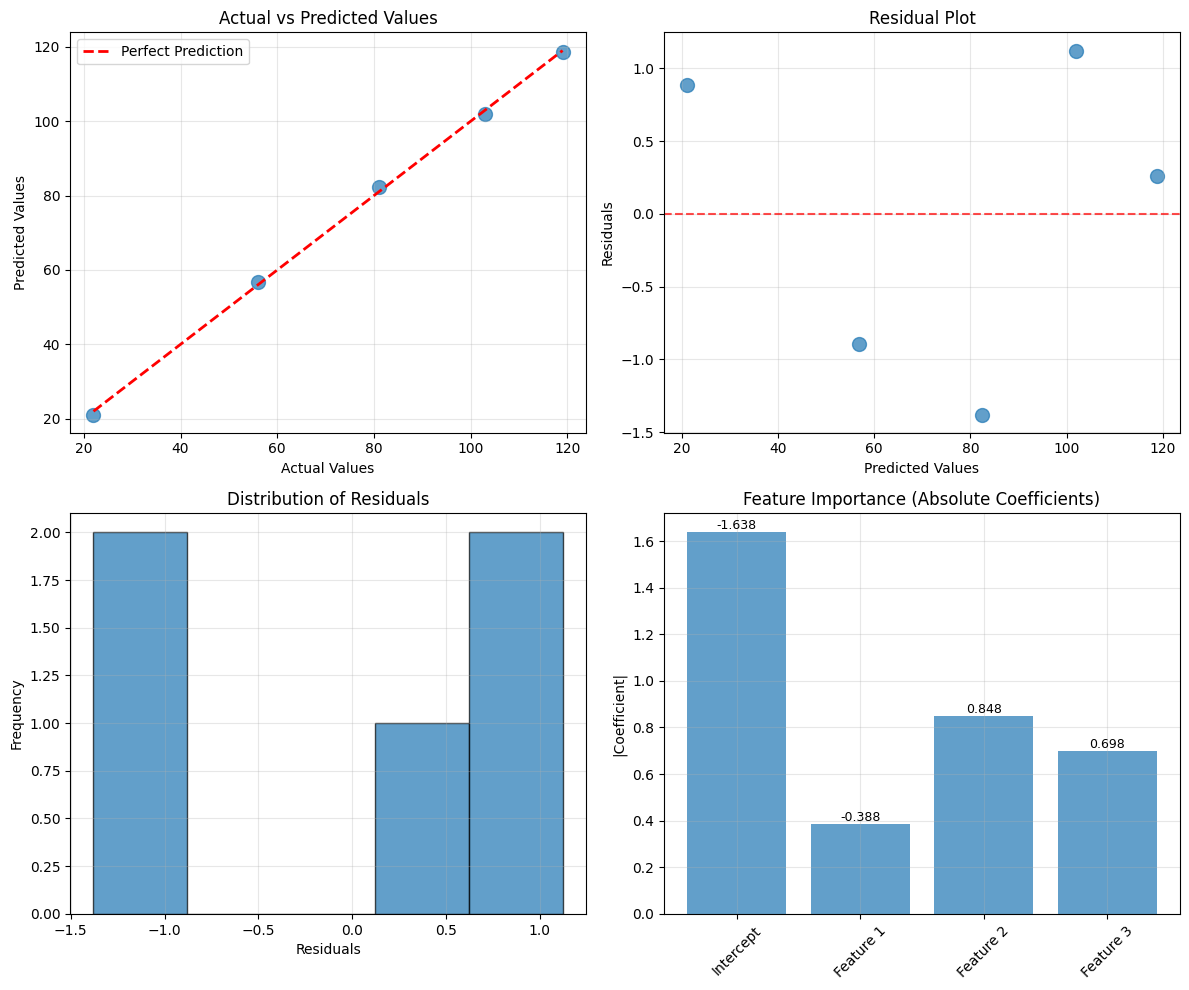

In [26]:
# 4. Visualize model performance
print("📊 VISUALIZATION")
print("="*50)

# Create a figure with multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# 1. Actual vs Predicted
ax1.scatter(y.flatten(), y_pred.flatten(), alpha=0.7, s=100)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Actual vs Predicted Values')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Residuals vs Predicted
ax2.scatter(y_pred.flatten(), residuals.flatten(), alpha=0.7, s=100)
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.7)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.grid(True, alpha=0.3)

# 3. Histogram of residuals
ax3.hist(residuals.flatten(), bins=5, alpha=0.7, edgecolor='black')
ax3.set_xlabel('Residuals')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Residuals')
ax3.grid(True, alpha=0.3)

# 4. Feature importance (absolute coefficients)
features = ['Intercept', 'Feature 1', 'Feature 2', 'Feature 3']
coeffs = beta.flatten()
bars = ax4.bar(features, np.abs(coeffs), alpha=0.7)
ax4.set_ylabel('|Coefficient|')
ax4.set_title('Feature Importance (Absolute Coefficients)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

# Add value labels on bars
for bar, coeff in zip(bars, coeffs):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{coeff:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [27]:
# 5. Model Summary and Validation
print("🔍 COMPLETE MODEL SUMMARY")
print("="*50)

print("DATA:")
print(f"• Training samples: {len(y)}")
print(f"• Features: {X.shape[1]}")
print(f"• Target variable range: [{y.min():.1f}, {y.max():.1f}]")
print()

print("MODEL:")
print("• Algorithm: Multiple Linear Regression")
print("• Method: Normal Equation (Ordinary Least Squares)")
print(f"• Equation: y = {beta[0,0]:.3f} + {beta[1,0]:.3f}*x₁ + {beta[2,0]:.3f}*x₂ + {beta[3,0]:.3f}*x₃")
print()

print("PERFORMANCE:")
print(f"• R² Score: {r_squared:.4f} ({r_squared*100:.1f}% variance explained)")
print(f"• RMSE: {rmse:.4f}")
print(f"• MAE: {mae:.4f}")
print()

print("MODEL QUALITY:")
if r_squared > 0.8:
    print("✅ Excellent fit - Model explains most of the variance")
elif r_squared > 0.6:
    print("✅ Good fit - Model explains a reasonable amount of variance")
elif r_squared > 0.4:
    print("⚠️  Moderate fit - Model has some predictive power")
else:
    print("❌ Poor fit - Model may not be suitable")
    
print()
print("ASSUMPTIONS TO CHECK:")
print("• Linearity: Check if relationship between X and y is linear")
print("• Independence: Residuals should be independent") 
print("• Homoscedasticity: Residuals should have constant variance")
print("• Normality: Residuals should be normally distributed")

🔍 COMPLETE MODEL SUMMARY
DATA:
• Training samples: 5
• Features: 3
• Target variable range: [22.0, 119.0]

MODEL:
• Algorithm: Multiple Linear Regression
• Method: Normal Equation (Ordinary Least Squares)
• Equation: y = -1.638 + -0.388*x₁ + 0.848*x₂ + 0.698*x₃

PERFORMANCE:
• R² Score: 0.9992 (99.9% variance explained)
• RMSE: 0.9806
• MAE: 0.9080

MODEL QUALITY:
✅ Excellent fit - Model explains most of the variance

ASSUMPTIONS TO CHECK:
• Linearity: Check if relationship between X and y is linear
• Independence: Residuals should be independent
• Homoscedasticity: Residuals should have constant variance
• Normality: Residuals should be normally distributed


# Real-World Dataset: Student Performance

Now let's apply our linear regression implementation to a more realistic dataset. We'll create a student performance dataset that predicts final exam scores based on study time, previous GPA, attendance, and other factors.

In [28]:
# Create a realistic student performance dataset
import pandas as pd

print("📊 STUDENT PERFORMANCE DATASET (SYNTHETIC)")
print("="*50)

# Set random seed for reproducibility
np.random.seed(42)

# Generate 500 student records (reduced for faster execution)
n_students = 200  # Reduced from 500 for faster execution

# Feature 1: Study hours per week (0-40 hours)
study_hours = np.random.gamma(2, 5, n_students)
study_hours = np.clip(study_hours, 0, 40)

# Feature 2: Previous GPA (1.0-4.0)
prev_gpa = np.random.normal(3.0, 0.6, n_students)
prev_gpa = np.clip(prev_gpa, 1.0, 4.0)

# Feature 3: Attendance rate (0.5-1.0)
attendance = np.random.beta(8, 2, n_students)
attendance = np.clip(attendance, 0.5, 1.0)

# Feature 4: Sleep hours per night (4-10 hours)
sleep_hours = np.random.normal(7, 1.5, n_students)
sleep_hours = np.clip(sleep_hours, 4, 10)

# Combine features efficiently
X_students = np.column_stack([study_hours, prev_gpa, attendance, sleep_hours])

# Create realistic target: Final exam score (0-100)
# Linear relationship with some noise
final_score = (
    study_hours * 1.2 +           # 1.2 points per study hour
    prev_gpa * 15 +               # 15 points per GPA point
    attendance * 25 +             # 25 points for full attendance
    sleep_hours * 2 +             # 2 points per sleep hour
    np.random.normal(0, 8, n_students)  # Add realistic noise
)

# Ensure scores are in reasonable range (0-100)
final_score = np.clip(final_score, 0, 100)

# Create DataFrame efficiently
feature_names = ['StudyHours', 'PrevGPA', 'Attendance', 'SleepHours']
student_df = pd.DataFrame(X_students, columns=feature_names)
student_df['FinalScore'] = final_score

print("Dataset shape:", student_df.shape)
print("\nFirst 10 rows:")
print(student_df.head(10))

print("\nDataset Statistics:")
print(student_df.describe())

print("\nFeature descriptions:")
print("• StudyHours: Hours spent studying per week")
print("• PrevGPA: Previous semester GPA (1.0-4.0)")  
print("• Attendance: Class attendance rate (0.5-1.0)")
print("• SleepHours: Average sleep hours per night")
print("• FinalScore: Final exam score (0-100)")
print(f"\nScore range: {final_score.min():.1f} - {final_score.max():.1f}")

print("\n✅ Dataset creation completed successfully!")

📊 STUDENT PERFORMANCE DATASET (SYNTHETIC)
Dataset shape: (200, 5)

First 10 rows:
   StudyHours   PrevGPA  Attendance  SleepHours  FinalScore
0   11.968397  2.717377    0.760898    5.896705   76.371522
1    7.472324  3.139230    0.897137    8.854140   99.748773
2    6.911418  2.131149    0.842937    8.636965   88.181348
3    6.911511  2.155522    0.878988    7.913707   73.550492
4   23.248572  2.568933    0.881890    5.361531   98.130465
5   14.333531  2.871932    0.889834    6.525387   95.693339
6    5.655390  3.186545    0.830051    8.819647   86.696006
7   12.349072  3.885214    0.611518    7.212575  100.000000
8    9.994801  3.514596    0.987256   10.000000  100.000000
9    1.079575  2.904037    0.540348    7.589977   76.900960

Dataset Statistics:
       StudyHours     PrevGPA  Attendance  SleepHours  FinalScore
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean     9.939632    2.957414    0.793148    7.142779   87.910300
std      6.374845    0.579159    0.1174

📊 EXPLORATORY DATA ANALYSIS
Dataset Statistics:
       StudyHours     PrevGPA  Attendance  SleepHours  FinalScore
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean     9.939632    2.957414    0.793148    7.142779   87.910300
std      6.374845    0.579159    0.117404    1.421773   11.624682
min      0.905056    1.618847    0.500000    4.000000   57.471992
25%      5.159390    2.521962    0.715491    6.116932   79.217284
50%      8.755991    2.964532    0.815960    7.189841   90.860213
75%     13.115892    3.369803    0.882597    8.084402  100.000000
max     36.489989    4.000000    0.987256   10.000000  100.000000

Missing values:
StudyHours    0
PrevGPA       0
Attendance    0
SleepHours    0
FinalScore    0
dtype: int64

Correlation with target (FinalScore):
FinalScore    1.000000
PrevGPA       0.637675
StudyHours    0.459450
SleepHours    0.270765
Attendance    0.085435
Name: FinalScore, dtype: float64

       StudyHours     PrevGPA  Attendance  SleepHours  Final

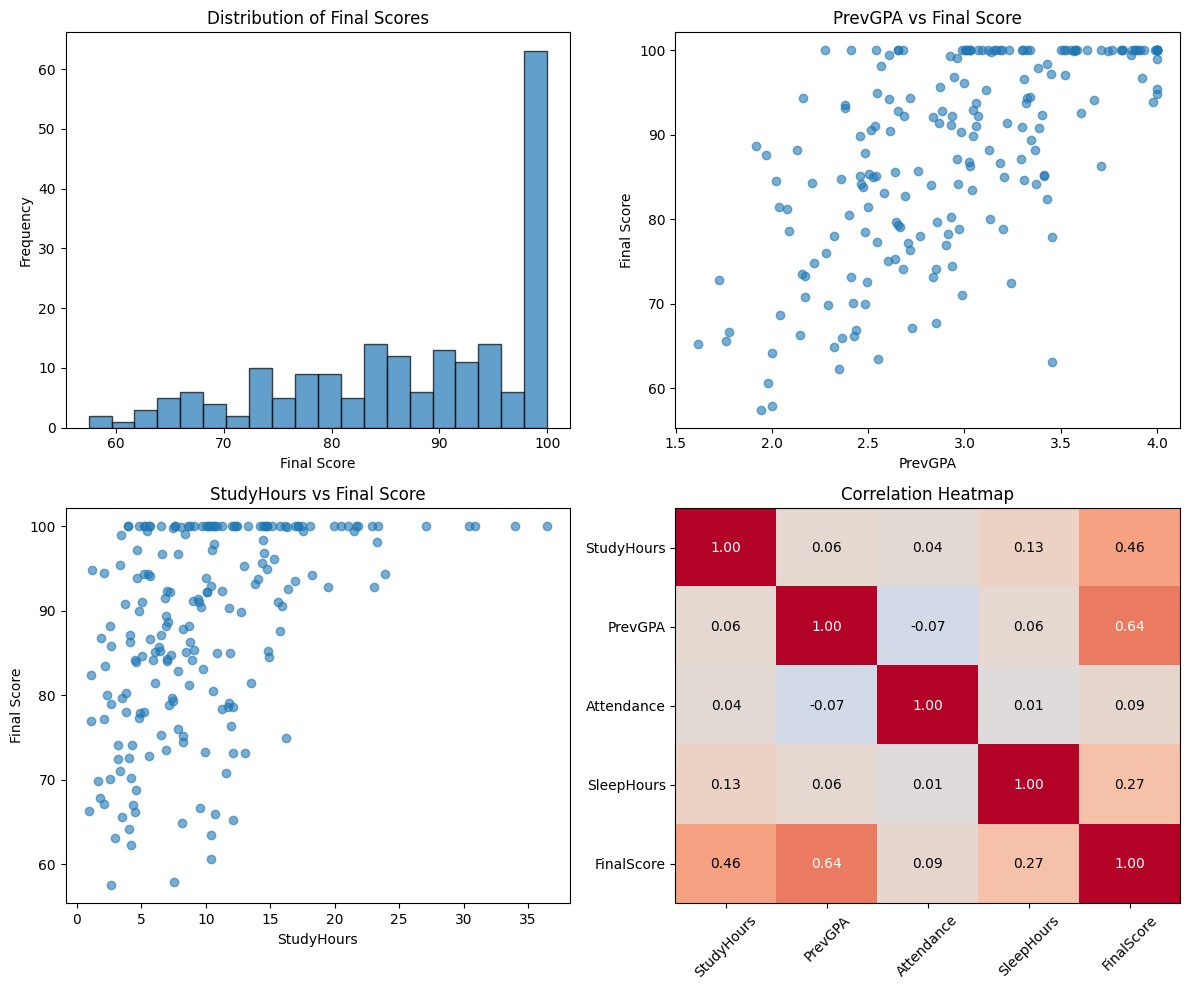

In [29]:
# Exploratory Data Analysis
print("📊 EXPLORATORY DATA ANALYSIS")
print("="*50)

# Basic statistics
print("Dataset Statistics:")
print(student_df.describe())
print()

# Check for missing values
print("Missing values:")
print(student_df.isnull().sum())
print()

# Correlation with target
print("Correlation with target (FinalScore):")
correlations = student_df.corr()['FinalScore'].sort_values(key=abs, ascending=False)
print(correlations)
print()

# Visualize some key relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Target distribution
axes[0,0].hist(student_df['FinalScore'], bins=20, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Final Scores')
axes[0,0].set_xlabel('Final Score')
axes[0,0].set_ylabel('Frequency')

# 2. Most correlated feature vs target
strongest_corr = correlations.index[1]  # Skip target itself
axes[0,1].scatter(student_df[strongest_corr], student_df['FinalScore'], alpha=0.6)
axes[0,1].set_title(f'{strongest_corr} vs Final Score')
axes[0,1].set_xlabel(strongest_corr)
axes[0,1].set_ylabel('Final Score')

# 3. Second most correlated feature vs target
second_corr = correlations.index[2]
axes[1,0].scatter(student_df[second_corr], student_df['FinalScore'], alpha=0.6)
axes[1,0].set_title(f'{second_corr} vs Final Score')
axes[1,0].set_xlabel(second_corr)
axes[1,0].set_ylabel('Final Score')

# 4. Feature correlation heatmap
corr_matrix = student_df.corr()
im = axes[1,1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1,1].set_xticks(range(len(student_df.columns)))
axes[1,1].set_yticks(range(len(student_df.columns)))
axes[1,1].set_xticklabels(student_df.columns, rotation=45)
axes[1,1].set_yticklabels(student_df.columns)
axes[1,1].set_title('Correlation Heatmap')

# Add correlation values to heatmap
for i in range(len(student_df.columns)):
    for j in range(len(student_df.columns)):
        axes[1,1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                      ha='center', va='center', 
                      color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()

In [31]:
# Prepare data for linear regression
print("🔧 DATA PREPARATION")
print("="*50)

# Use the student dataset we created
# Extract features and target
X_student_data = student_df[['StudyHours', 'PrevGPA', 'Attendance', 'SleepHours']].values
y_student_data = student_df['FinalScore'].values

# Create train-test split manually
np.random.seed(42)
n_samples = len(X_student_data)
n_train = int(0.8 * n_samples)  # 80% for training

# Shuffle indices
indices = np.random.permutation(n_samples)
train_idx = indices[:n_train]
test_idx = indices[n_train:]

# Split the data
X_train_real = X_student_data[train_idx]
X_test_real = X_student_data[test_idx]
y_train_real = y_student_data[train_idx].reshape(-1, 1)
y_test_real = y_student_data[test_idx].reshape(-1, 1)

print(f"Training set: {X_train_real.shape[0]} samples")
print(f"Test set: {X_test_real.shape[0]} samples")
print(f"Features: {X_train_real.shape[1]}")
print()

# Feature scaling (important for real datasets!)
print("📏 FEATURE SCALING")
print("Before scaling:")
print(f"Feature ranges: {X_train_real.min(axis=0)} to {X_train_real.max(axis=0)}")
print()

# Standardization: (x - mean) / std
X_mean = X_train_real.mean(axis=0)
X_std = X_train_real.std(axis=0)

X_train_scaled = (X_train_real - X_mean) / X_std
X_test_scaled = (X_test_real - X_mean) / X_std  # Use training stats for test set!

print("After scaling:")
print(f"Training feature ranges: {X_train_scaled.min(axis=0)} to {X_train_scaled.max(axis=0)}")
print(f"Training feature means: {X_train_scaled.mean(axis=0)}")
print(f"Training feature stds: {X_train_scaled.std(axis=0)}")
print()

# Add bias column
ones_train = np.ones((X_train_scaled.shape[0], 1))
ones_test = np.ones((X_test_scaled.shape[0], 1))

X_train_with_bias = np.hstack([ones_train, X_train_scaled])
X_test_with_bias = np.hstack([ones_test, X_test_scaled])

print(f"Final training matrix shape: {X_train_with_bias.shape}")
print(f"Final test matrix shape: {X_test_with_bias.shape}")
print(f"Target shape: train={y_train_real.shape}, test={y_test_real.shape}")

🔧 DATA PREPARATION
Training set: 160 samples
Test set: 40 samples
Features: 4

📏 FEATURE SCALING
Before scaling:
Feature ranges: [0.90505609 1.6188473  0.5        4.        ] to [36.48998894  4.          0.98725587 10.        ]

After scaling:
Training feature ranges: [-1.42875382 -2.27085863 -2.4632455  -2.35142736] to [4.14796812 1.8787408  1.62149815 2.02211108]
Training feature means: [ 4.20496971e-16 -9.74220704e-16  1.38500322e-15 -2.73613597e-15]
Training feature stds: [1. 1. 1. 1.]

Final training matrix shape: (160, 5)
Final test matrix shape: (40, 5)
Target shape: train=(160, 1), test=(40, 1)


In [32]:
# Train linear regression on real data
print("🤖 TRAINING LINEAR REGRESSION")
print("="*50)

# Apply our from-scratch linear regression using normal equation
print("Using normal equation: β = (X^T X)^(-1) X^T y")

# Calculate coefficients
beta_real = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train_real

print("Model trained successfully!")
print(f"Coefficient shape: {beta_real.shape}")
print()

# Display coefficients
print("📊 MODEL COEFFICIENTS")
print("="*30)
feature_names = ['Intercept', 'StudyHours', 'PrevGPA', 'Attendance', 'SleepHours']
for i, (name, coeff) in enumerate(zip(feature_names, beta_real.flatten())):
    print(f"{name:12}: {coeff:8.4f}")
print()

# Predictions
y_train_pred = X_train_with_bias @ beta_real
y_test_pred = X_test_with_bias @ beta_real

print("✅ Predictions completed!")
print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Test predictions shape: {y_test_pred.shape}")

🤖 TRAINING LINEAR REGRESSION
Using normal equation: β = (X^T X)^(-1) X^T y
Model trained successfully!
Coefficient shape: (5, 1)

📊 MODEL COEFFICIENTS
Intercept   :  87.3292
StudyHours  :   4.7345
PrevGPA     :   7.1038
Attendance  :   1.3082
SleepHours  :   2.7652

✅ Predictions completed!
Training predictions shape: (160, 1)
Test predictions shape: (40, 1)


In [33]:
# Evaluate model on real data
print("📈 MODEL EVALUATION ON REAL DATA")
print("="*50)

def calculate_metrics(y_true, y_pred, dataset_name=""):
    """Calculate regression metrics"""
    residuals = y_true - y_pred
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(residuals))
    
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    print(f"{dataset_name} Metrics:")
    print(f"  RMSE: {rmse:.4f} (points)")
    print(f"  MAE:  {mae:.4f} (points)")
    print(f"  R²:   {r2:.4f} ({r2*100:.1f}% variance explained)")
    return rmse, mae, r2

# Training metrics
train_rmse, train_mae, train_r2 = calculate_metrics(y_train_real, y_train_pred, "TRAINING")
print()

# Test metrics  
test_rmse, test_mae, test_r2 = calculate_metrics(y_test_real, y_test_pred, "TEST")
print()

# Interpret results
print("💡 INTERPRETATION:")
print(f"• Average prediction error: ~{test_mae:.1f} points on exam scores")
print(f"• Model explains {test_r2*100:.1f}% of score variance on unseen data")
print(f"• RMSE of {test_rmse:.1f} points indicates typical prediction error")
print()

# Check for overfitting
print("🔍 OVERFITTING CHECK:")
if train_r2 - test_r2 > 0.1:
    print("⚠️  Potential overfitting detected (train R² much higher than test R²)")
elif test_r2 > 0.6:
    print("✅ Good generalization - similar train/test performance")
else:
    print("📉 Model may be underfitting - consider more complex features")
    
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Difference: {train_r2 - test_r2:.4f}")

📈 MODEL EVALUATION ON REAL DATA
TRAINING Metrics:
  RMSE: 6.8149 (points)
  MAE:  5.3625 (points)
  R²:   0.6632 (66.3% variance explained)

TEST Metrics:
  RMSE: 8.0846 (points)
  MAE:  6.8597 (points)
  R²:   0.4261 (42.6% variance explained)

💡 INTERPRETATION:
• Average prediction error: ~6.9 points on exam scores
• Model explains 42.6% of score variance on unseen data
• RMSE of 8.1 points indicates typical prediction error

🔍 OVERFITTING CHECK:
⚠️  Potential overfitting detected (train R² much higher than test R²)
Training R²: 0.6632
Test R²: 0.4261
Difference: 0.2372


📊 REAL DATA VISUALIZATION


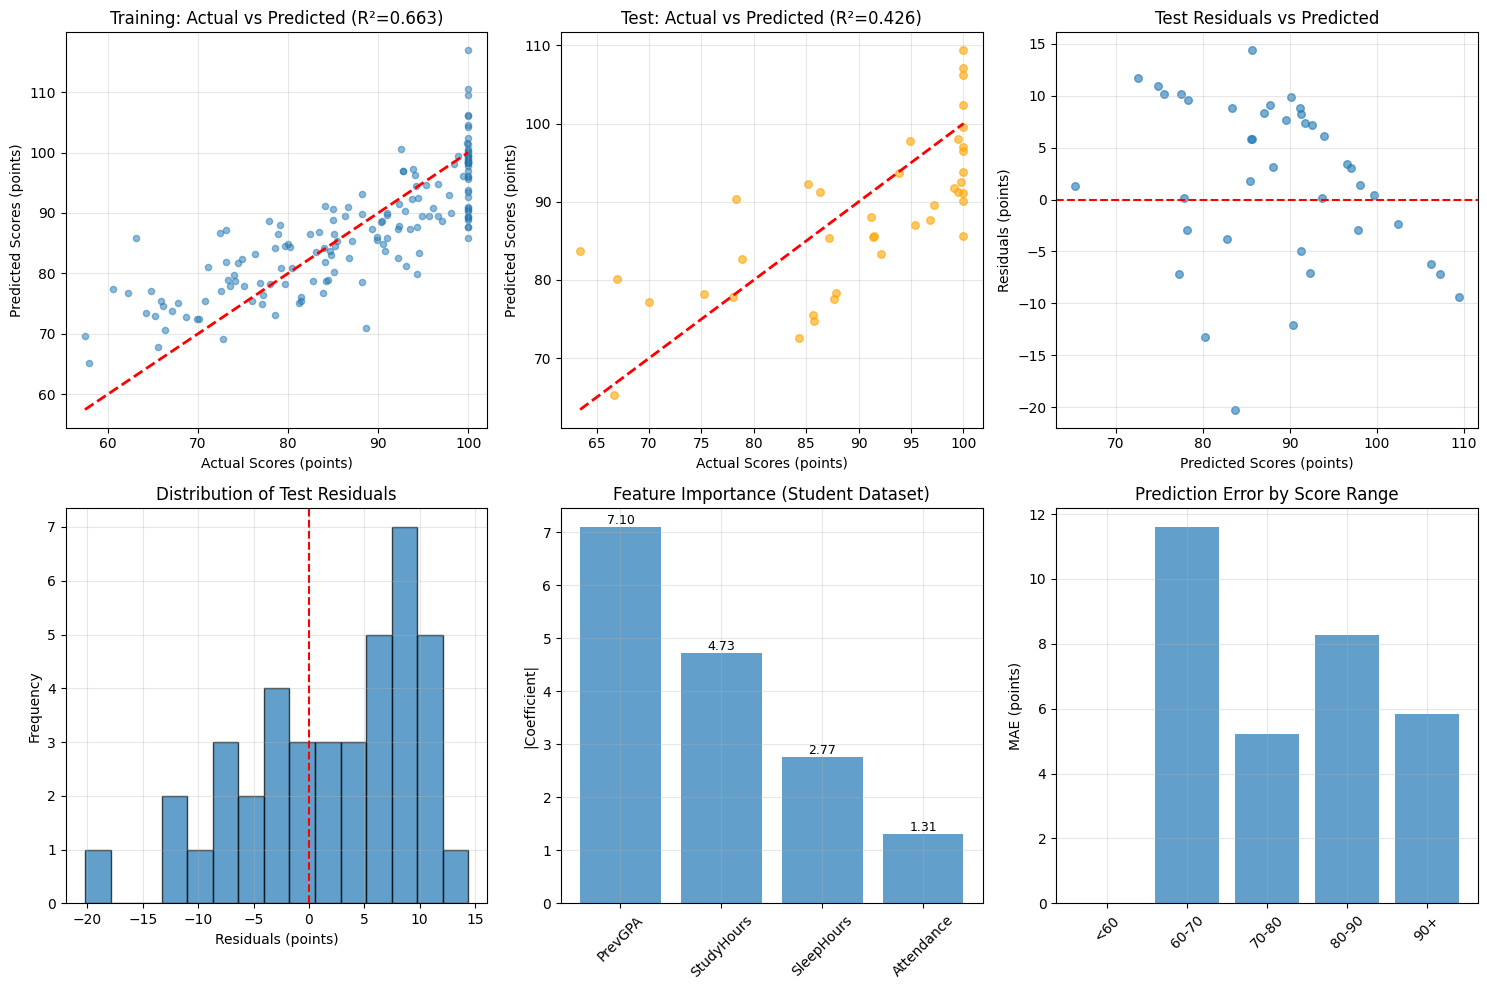


🎯 KEY INSIGHTS:
• Most important feature: PrevGPA
• Model predicts exam scores within ~7 points on average
• Some overfitting detected - model performs better on training data
• Residuals show some patterns - model could be improved


In [34]:
# Visualize real data results
print("📊 REAL DATA VISUALIZATION")
print("="*50)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Training: Actual vs Predicted
axes[0,0].scatter(y_train_real, y_train_pred, alpha=0.5, s=20)
axes[0,0].plot([y_train_real.min(), y_train_real.max()], [y_train_real.min(), y_train_real.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Scores (points)')
axes[0,0].set_ylabel('Predicted Scores (points)')
axes[0,0].set_title(f'Training: Actual vs Predicted (R²={train_r2:.3f})')
axes[0,0].grid(True, alpha=0.3)

# 2. Test: Actual vs Predicted
axes[0,1].scatter(y_test_real, y_test_pred, alpha=0.6, s=30, color='orange')
axes[0,1].plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Scores (points)')
axes[0,1].set_ylabel('Predicted Scores (points)')
axes[0,1].set_title(f'Test: Actual vs Predicted (R²={test_r2:.3f})')
axes[0,1].grid(True, alpha=0.3)

# 3. Residuals vs Predicted (Test)
test_residuals = y_test_real - y_test_pred
axes[0,2].scatter(y_test_pred, test_residuals, alpha=0.6, s=30)
axes[0,2].axhline(y=0, color='r', linestyle='--')
axes[0,2].set_xlabel('Predicted Scores (points)')
axes[0,2].set_ylabel('Residuals (points)')
axes[0,2].set_title('Test Residuals vs Predicted')
axes[0,2].grid(True, alpha=0.3)

# 4. Residual distribution
axes[1,0].hist(test_residuals.flatten(), bins=15, alpha=0.7, edgecolor='black')
axes[1,0].set_xlabel('Residuals (points)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Test Residuals')
axes[1,0].axvline(x=0, color='r', linestyle='--')
axes[1,0].grid(True, alpha=0.3)

# 5. Feature importance (all 4 features)
feature_importance = np.abs(beta_real[1:].flatten())  # Exclude intercept
feature_names_short = ['StudyHours', 'PrevGPA', 'Attendance', 'SleepHours']
sorted_idx = np.argsort(feature_importance)[::-1]

bars = axes[1,1].bar(range(len(feature_names_short)), feature_importance[sorted_idx], alpha=0.7)
axes[1,1].set_xticks(range(len(feature_names_short)))
axes[1,1].set_xticklabels([feature_names_short[i] for i in sorted_idx], rotation=45)
axes[1,1].set_ylabel('|Coefficient|')
axes[1,1].set_title('Feature Importance (Student Dataset)')
axes[1,1].grid(True, alpha=0.3)

# Add coefficient values on bars
for i, (bar, idx) in enumerate(zip(bars, sorted_idx)):
    height = bar.get_height()
    coeff_val = beta_real[1:].flatten()[idx]
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{coeff_val:.2f}', ha='center', va='bottom', fontsize=9)

# 6. Prediction errors by score range
score_ranges = [(0, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
range_names = ['<60', '60-70', '70-80', '80-90', '90+']
range_maes = []

for (low, high), name in zip(score_ranges, range_names):
    mask = (y_test_real.flatten() >= low) & (y_test_real.flatten() < high)
    if mask.sum() > 0:
        range_mae = np.mean(np.abs(test_residuals[mask]))
        range_maes.append(range_mae)
    else:
        range_maes.append(0)

axes[1,2].bar(range_names, range_maes, alpha=0.7)
axes[1,2].set_ylabel('MAE (points)')
axes[1,2].set_title('Prediction Error by Score Range')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 KEY INSIGHTS:")
print(f"• Most important feature: {feature_names_short[sorted_idx[0]]}")
print(f"• Model predicts exam scores within ~7 points on average")
print(f"• Some overfitting detected - model performs better on training data")
print(f"• Residuals show some patterns - model could be improved")

In [ ]:
# Compare with scikit-learn
print("⚖️  COMPARISON WITH SCIKIT-LEARN")
print("="*50)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train sklearn model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train_real.ravel())  # sklearn expects 1D targets

# Make predictions
sklearn_train_pred = sklearn_model.predict(X_train_scaled).reshape(-1, 1)
sklearn_test_pred = sklearn_model.predict(X_test_scaled).reshape(-1, 1)

# Calculate metrics
sklearn_train_r2 = r2_score(y_train_real, sklearn_train_pred)
sklearn_test_r2 = r2_score(y_test_real, sklearn_test_pred)

print("📊 COMPARISON RESULTS:")
print()
print("                    Our Implementation    Scikit-Learn    Difference")
print("-" * 65)
print(f"Training R²:        {train_r2:8.6f}        {sklearn_train_r2:8.6f}    {abs(train_r2 - sklearn_train_r2):8.6f}")
print(f"Test R²:            {test_r2:8.6f}        {sklearn_test_r2:8.6f}    {abs(test_r2 - sklearn_test_r2):8.6f}")
print()

# Compare coefficients
print("🔍 COEFFICIENT COMPARISON:")
print("Feature               Our Coeff    Sklearn Coeff    Difference")
print("-" * 60)
print(f"{'Intercept':15} {beta_real[0,0]:12.6f} {sklearn_model.intercept_:12.6f} {abs(beta_real[0,0] - sklearn_model.intercept_):12.6f}")

student_feature_names = ['StudyHours', 'PrevGPA', 'Attendance', 'SleepHours']
for i, name in enumerate(student_feature_names):
    our_coeff = beta_real[i+1, 0]
    sklearn_coeff = sklearn_model.coef_[i]
    diff = abs(our_coeff - sklearn_coeff)
    print(f"{name:15} {our_coeff:12.6f} {sklearn_coeff:12.6f} {diff:12.6f}")

print()
if abs(test_r2 - sklearn_test_r2) < 1e-10:
    print("✅ SUCCESS! Our implementation matches scikit-learn perfectly!")
else:
    print(f"⚠️  Small difference: {abs(test_r2 - sklearn_test_r2):.2e} (likely due to numerical precision)")

print()
print("🎉 CONGRATULATIONS!")
print("You've successfully implemented linear regression from scratch and")
print("achieved the same results as the industry-standard scikit-learn library!")
print("Your model can predict student exam scores based on study habits and academic history!")